In [1]:
import xarray as xr
import numpy as np
import xgcm
import xmitgcm
from matplotlib import pyplot as plt
%matplotlib inline
import os
#plt.rcParams['figure.figsize'] = (12,6)
#import glob
import ecco_v4_py as ecco
from matplotlib import cm
import xrft
#from MITgcmutils import mds
import xesmf as xe
import scicomap as sc
import cmocean
import pandas as pd
import pyinterp
from cartopy import crs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import pyinterp
from matplotlib.colors import LightSource
from matplotlib import cbook,cm
import matplotlib.colors as colors


In [2]:
tracers_combined = xr.open_dataset("tracers_combined.nc")
print(tracers_combined)

<xarray.Dataset> Size: 8GB
Dimensions:                        (site: 6, time: 31, Z: 63, lat: 420, lon: 420)
Coordinates:
  * time                           (time) datetime64[ns] 248B 2089-12-28T12:0...
  * Z                              (Z) float32 252B -0.5 -1.5 ... -5.906e+03
  * lat                            (lat) float64 3kB -50.0 -49.83 ... 19.83
  * lon                            (lon) float64 3kB 35.0 35.17 ... 104.7 104.8
  * site                           (site) <U9 216B 'Longqi' ... 'Kairei'
Data variables:
    __xarray_dataarray_variable__  (site, time, Z, lat, lon) float32 8GB ...


In [5]:
tracers_combined

<xarray.Dataset> Size: 8GB
Dimensions:                        (site: 6, time: 31, Z: 63, lat: 420, lon: 420)
Coordinates:
  * time                           (time) datetime64[ns] 248B 2089-12-28T12:0...
  * Z                              (Z) float32 252B -0.5 -1.5 ... -5.906e+03
  * lat                            (lat) float64 3kB -50.0 -49.83 ... 19.83
  * lon                            (lon) float64 3kB 35.0 35.17 ... 104.7 104.8
  * site                           (site) <U9 216B 'Longqi' ... 'Kairei'
Data variables:
    __xarray_dataarray_variable__  (site, time, Z, lat, lon) float32 8GB ...

In [6]:
str( tracers_combined.time[0].values )[0:7]

'2089-12'

In [7]:
tracers_xr = xr.open_dataset("tracers_at6Stations.nc")

In [8]:
da = xr.DataArray(
    data=tracers_xr.to_array().squeeze(),  # 提取数据并去除多余维度
    dims=["tracer", "station", "time", "depth"],
    coords={
        "tracer": tracers_xr.tracer.values,
        "station": tracers_xr.station.values,
        "time": tracers_xr.time.values,
        "depth": tracers_xr.depth.values
    }
)

In [9]:
da

<xarray.DataArray (tracer: 6, station: 6, time: 31, depth: 63)> Size: 562kB
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 3.16078848e-17,  3.53891821e-17,  4.28692672e-17, ...,
                      nan,             nan,             nan],
         [ 1.87792447e-12,  1.85512044e-12,  1.82658576e-12, ...,
                      nan,             nan,             nan],
         ...,
         [ 2.85516586e-02,  2.82609984e-02,  2.82137319e-02, ...,
                      nan,             nan,             nan],
         [ 2.97291040e+00,  2.98972607e+00,  3.02644944e+00, ...,
                      nan,             nan,             nan],
         [ 3.78573574e-02,  3.63998823e-02,  3.43394205e-02, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [-5.97246516e-22, -6.10971231e-22, -6.37075787e-22, ...,
                      nan,             nan,             nan],
         [ 3.23360005e-09,  3.35635786e-09,  3.55574636e-09, ...,
                      nan,             nan,             nan],
...
                      nan,             nan,             nan],
         [ 1.12468741e-04,  1.13346498e-04,  1.14779352e-04, ...,
                      nan,             nan,             nan],
         [ 5.03824966e-04,  4.98443434e-04,  4.88873571e-04, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 3.65451080e-25,  3.72061907e-25,  3.52550665e-25, ...,
                      nan,             nan,             nan],
         [ 1.89190434e-18,  1.89405873e-18,  1.90107301e-18, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.80550956e-03,  1.81452115e-03,  1.83082395e-03, ...,
                      nan,             nan,             nan],
         [ 8.78010644e-04,  8.84544628e-04,  9.00137413e-04, ...,
                      nan,             nan,             nan],
         [ 2.40477314e-03,  2.41403957e-03,  2.43735267e-03, ...,
                      nan,             nan,             nan]]]],
      shape=(6, 6, 31, 63))
Coordinates:
  * tracer   (tracer) <U6 144B 'trac01' 'trac03' 'trac06' ... 'trac02' 'trac04'
  * station  (station) <U9 216B 'Longqi' 'Tiancheng' ... 'Onnuri' 'Wocan'
  * time     (time) float64 248B 0.0 0.5 1.0 1.5 2.0 ... 13.5 14.0 14.5 15.0
  * depth    (depth) float32 252B -0.5 -1.5 -2.5 ... -5.461e+03 -5.906e+03

In [3]:
trac01_data = tracers_combined.sel(site='Longqi')
trac03_data = tracers_combined.sel(site='Tiancheng')
trac06_data = tracers_combined.sel(site='Kairei')
trac05_data = tracers_combined.sel(site='Solitaire')
trac02_data = tracers_combined.sel(site='Onnuri')
trac04_data = tracers_combined.sel(site='Wocan')

/home/xichen/tmp/ipykernel_1391772/252823933.py:22: RuntimeWarning: divide by zero encountered in log10
  cs = axs[i,j].contourf(tt,zz/1e3,np.log10(da.values[j,i].T),levels=np.arange(1,7,1),cmap=cmaps[j] )
/home/xichen/tmp/ipykernel_1391772/252823933.py:22: RuntimeWarning: invalid value encountered in log10
  cs = axs[i,j].contourf(tt,zz/1e3,np.log10(da.values[j,i].T),levels=np.arange(1,7,1),cmap=cmaps[j] )


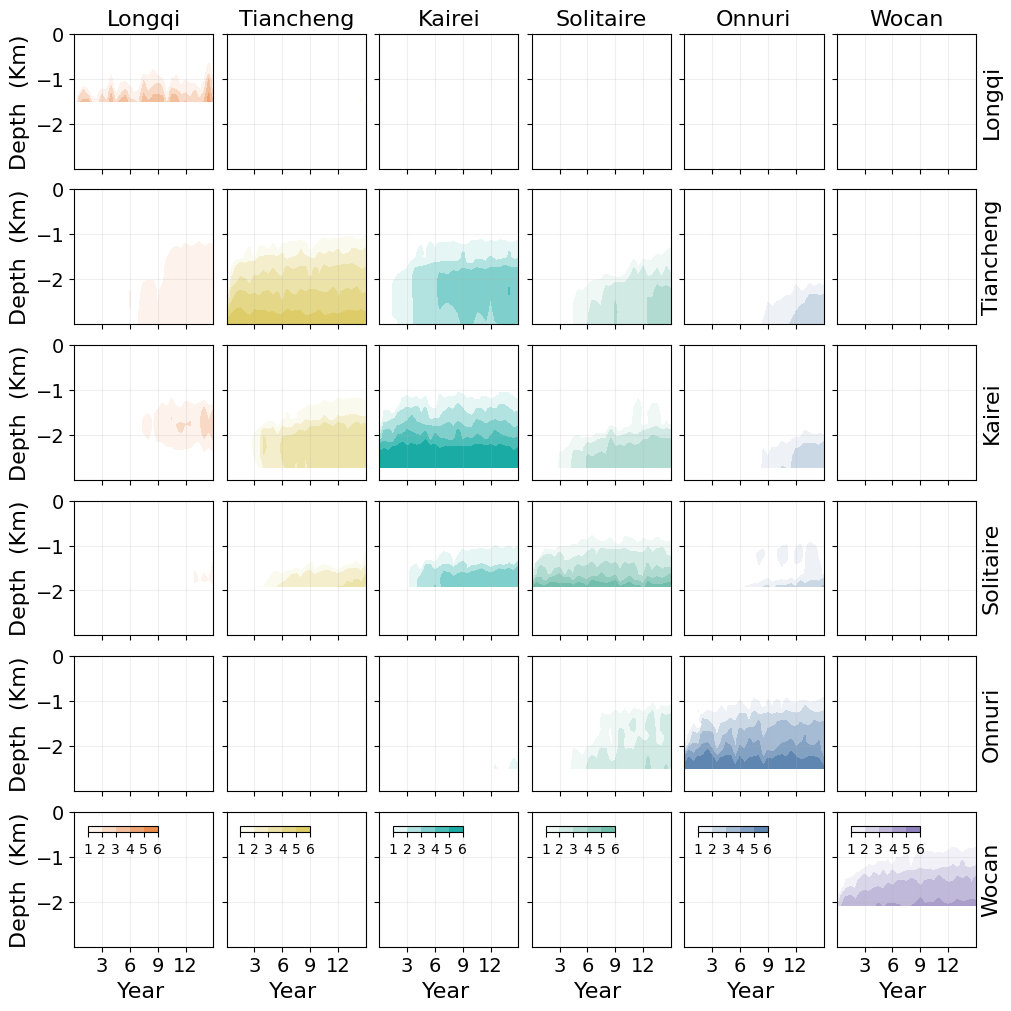

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import colorsys

tt = np.arange(0,15.5,0.5)
zz = tracers_combined.Z.values 
#cmaps = ['#E67F3C','#D9C756','#61b09d','#63B7A3','#4E79A9','#8474B6']

custom_colors = ['#E67F3C','#D9C756','#00a29a','#63B7A3','#4E79A9','#8474B6']

# 创建自定义colormap
cmaps = [mcolors.LinearSegmentedColormap.from_list("custom", ["white", color], N=256) 
         for color in custom_colors]

fig, axs = plt.subplots(6,6,constrained_layout=True,sharex=True,sharey=True,figsize=(10,10))
for j in range(6):
    for i in range(6):   
        axs[i,j].tick_params(labelsize=14)
        
        cs = axs[i,j].contourf(tt,zz/1e3,np.log10(da.values[j,i].T),levels=np.arange(1,7,1),cmap=cmaps[j] )
        
        if i==0:
            axs[i,j].set_title(da.station.values[j],fontsize=16)
        
        axs[i,j].set_ylim(-3,0)
        axs[i,j].set_xticks([3,6,9,12])
        axs[i,j].set_yticks([-2,-1,0])
        axs[i,j].grid(True,alpha=0.2)
        
        if j==0:
            axs[i,j].set_ylabel('Depth  (Km)',fontsize=16)
            
        if j==5:
            axs[i,j].yaxis.set_label_position("right")
            axs[i,j].set_ylabel(da.station[i].values,fontsize=16)
        if i==5:
            #cbaxes = fig.add_axes(ax=axs[i,j])  
            axs[i,j].set_xlabel('Year ',fontsize=16)
            cax = inset_axes(axs[i, j], width="50%", height="5%", loc='upper left', borderpad=1)
            fig.colorbar(cs,ax=axs[i,j],orientation='horizontal', cax=cax )#fraction=0.05, pad=0.1)  

plt.savefig('allsites_tracers.pdf', format='pdf', dpi=1000)            

In [7]:
#trac01 = xr.open_dataarray("tracers_combined.nc")
trac01 = xr.open_dataset("tracers_combined.nc")
lonall    = np.array([ 65.848167,     60.505555,    70.040333, 66.42366666666666,   63.92166666666667,    49.64938333333333, 50.4, 66.4983] )
latall    = np.array([-19.556833,      6.376666,   -25.320500, -11.414666666666667, -27.85,    -37.78378333333333,  -37.65, -11.900]  )
site    = ['Solitaire',      'Wocan',      'Kairei',   'Onnuri & Onnare',     'Tiancheng',          'Longqi & Duanqiao', '', '']

In [18]:
trac01.__xarray_dataarray_variable__.shape

(6, 31, 63, 420, 420)

In [19]:
trac01.time.size

31

In [4]:
topo540 = xr.open_dataarray( 'Depth.20850101.nc' )

In [5]:
topo540

<xarray.DataArray (lat: 870, lon: 2160)> Size: 8MB
[1879200 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B ...
  * lat      (lat) float64 7kB -75.0 -74.83 -74.67 -74.5 ... 69.5 69.67 69.83
  * lon      (lon) float64 17kB -180.0 -179.8 -179.7 ... 179.5 179.7 179.8

/home/xichen/tmp/ipykernel_2386546/408857298.py:28: RuntimeWarning: invalid value encountered in log10
  ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/408857298.py:30: RuntimeWarning: invalid value encountered in log10
  ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac02_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/408857298.py:32: RuntimeWarning: invalid value encountered in log10
  ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac03_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/408857298.py:34: RuntimeWarning: invalid value encountered in log10
  ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac04_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen

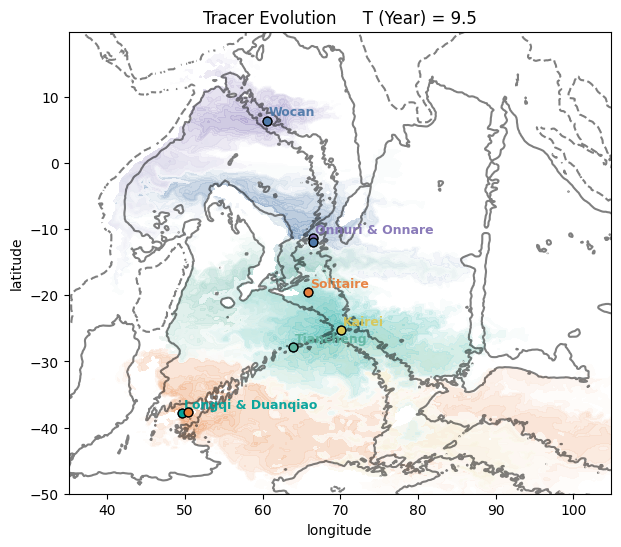

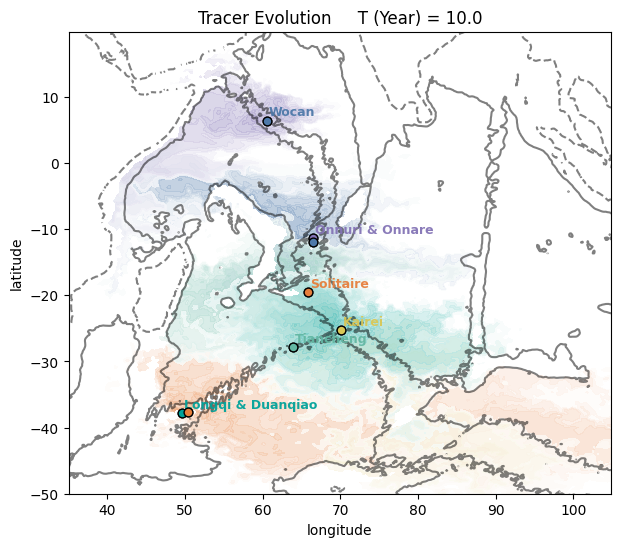

In [100]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import colorsys
kk = 50

##custom_colors = ['#E67F3C','#D9C756','#00a29a','#63B7A3','#4E79A9','#8474B6']

custom_colors = ['#E67F3C','#4E79A9','#D9C756','#8474B6','#63B7A3','#00a29a']

#site    = ['Solitaire',      'Wocan',      'Kairei',   'Onnuri & Onnare',     'Tiancheng',          'Longqi & Duanqiao', '', '']

# 创建自定义colormap
cmaps = [mcolors.LinearSegmentedColormap.from_list("custom", ["white", color], N=256) 
         for color in custom_colors]


#for tt in range(0,31):
for tt in range(19,21):
    fig,ax =plt.subplots(1,1,figsize=(7, 6))
    
    # 首先填充灰色区域（虚线等高线内）
    ax.contourf(topo540.lon, topo540.lat, topo540, 
                levels=[-np.inf,-20], 
                colors=['gray'], 
                alpha=0.25)
    
    # use contour with 'lons' and 'lats' for the plot x and y axes
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[0],alpha=0.7,levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac02_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[1],alpha=0.7,levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac03_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[2],alpha=0.7,levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac04_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[3],alpha=0.7,levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac05_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[4],alpha=0.7,levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,np.log10(trac06_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
             cmap=cmaps[5],alpha=0.7,levels=np.arange(2,6.25,0.25))
    #ax.set_title('Tracer Evolution' + '  Z='+str(int(-trac01.Z[kk].values))+'  T='+str(tt) )
    ax.set_title('Tracer Evolution' + '     T (Year) = '+str(tt/2) )

    ax.set_xlim(np.nanmin(trac01.lon.values), np.nanmax(trac01.lon.values))
    ax.set_ylim(np.nanmin(trac01.lat.values), np.nanmax(trac01.lat.values))

    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')
    #plt.colorbar()

    ax.scatter(lonall, latall, c='black')
    for i in range(8):
        ax.text(lonall[i]+0.25,latall[i]+0.75,site[i], alpha=0.95 )

    ax.contour(topo540.lon,topo540.lat,-topo540,levels=[-3500],linestyles=['solid'],colors='black',alpha=0.5)
    ax.contour(topo540.lon,topo540.lat,topo540,levels=[20],linestyles=['dashed'],colors='black',alpha=0.5)           #20
   
    if tt<10:
        fig.savefig('tracer_0'+str(int(tt))+'Z'+str(int(-trac01.Z[kk].values))+'.pdf',dpi=1200)
    else:
        fig.savefig('tracer_'+str(int(tt))+'Z'+str(int(-trac01.Z[kk].values))+'.pdf',dpi=1200)

ValueError: Contour levels must be increasing

/home/xichen/biosoftware/miniforge3/envs/jupyterlab/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/xichen/biosoftware/miniforge3/envs/jupyterlab/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/xichen/biosoftware/miniforge3/envs/jupyterlab/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/xichen/biosoftware/miniforge3/envs/jupyterlab/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/xichen/biosoftware/miniforge3/envs/jupyterlab/lib/python3.13/site-packages/

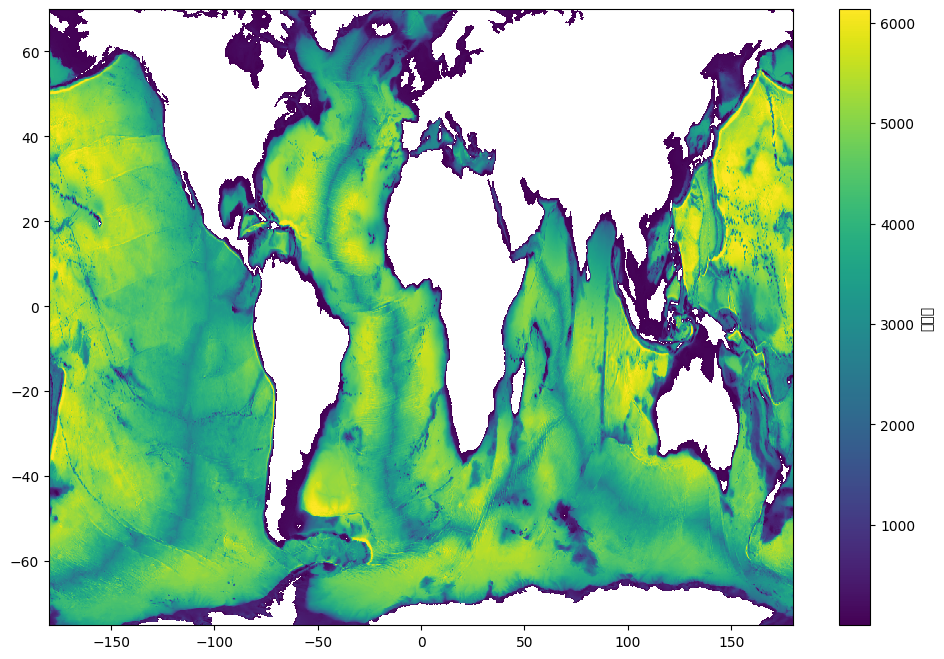

In [62]:
# 单独绘制地形图检查
plt.figure(figsize=(12, 8))
mesh = plt.pcolormesh(topo540.lon, topo540.lat, topo540, 
                      cmap='viridis', shading='auto')
plt.colorbar(mesh, label='地形值')
plt.contour(topo540.lon, topo540.lat, topo540, levels=[0], colors='red')  # 海陆分界线
plt.contour(topo540.lon, topo540.lat, topo540, levels=[20, -20], colors='white')  # 20米高度线
plt.title('地形数据检查')
plt.show()


/home/xichen/tmp/ipykernel_2386546/1297813627.py:35: RuntimeWarning: divide by zero encountered in log10
  np.log10(trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/1297813627.py:35: RuntimeWarning: invalid value encountered in log10
  np.log10(trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/1297813627.py:38: RuntimeWarning: divide by zero encountered in log10
  np.log10(trac02_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/1297813627.py:38: RuntimeWarning: invalid value encountered in log10
  np.log10(trac02_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/1297813627.py:41: RuntimeWarning: divide by zero encountered in log10
  np.log10(trac03_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values),
/home/xichen/tmp/ipykernel_2386546/1297813627.py:41:

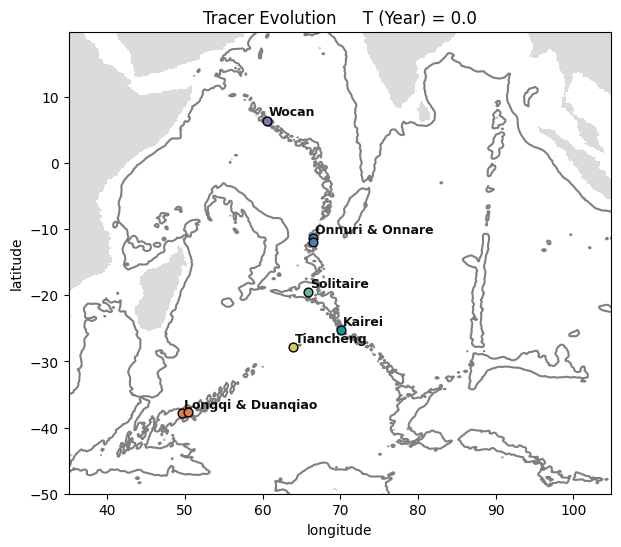

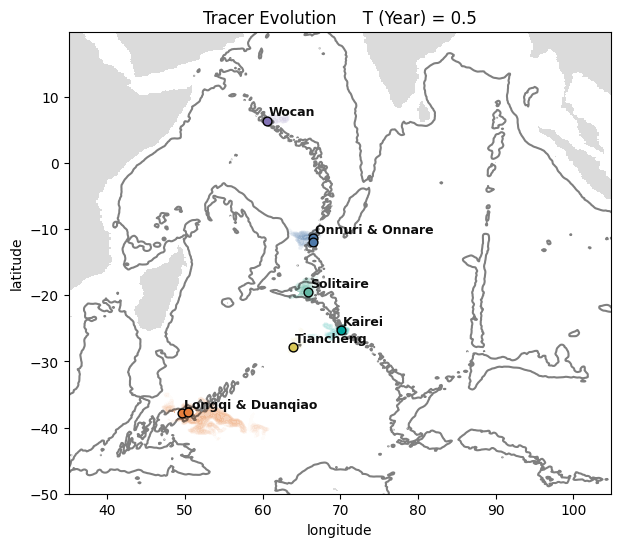

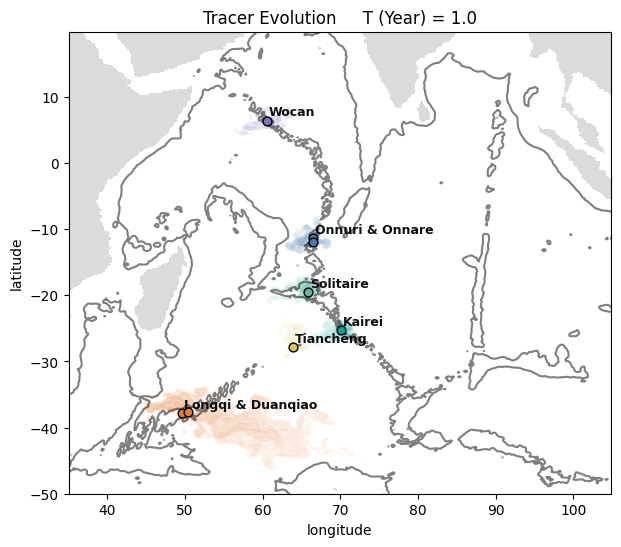

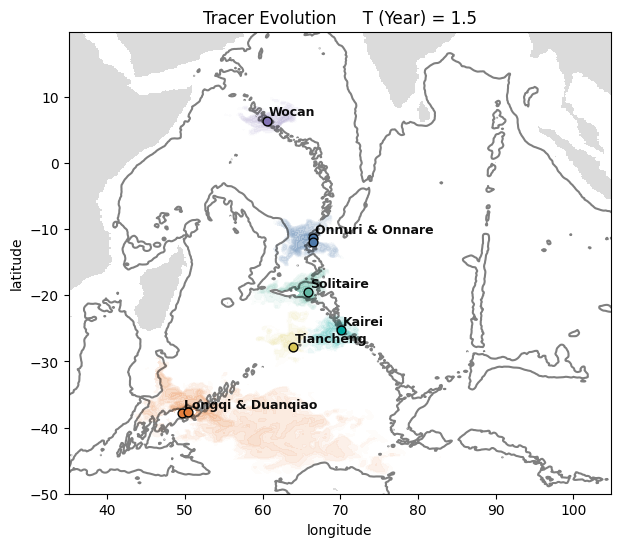

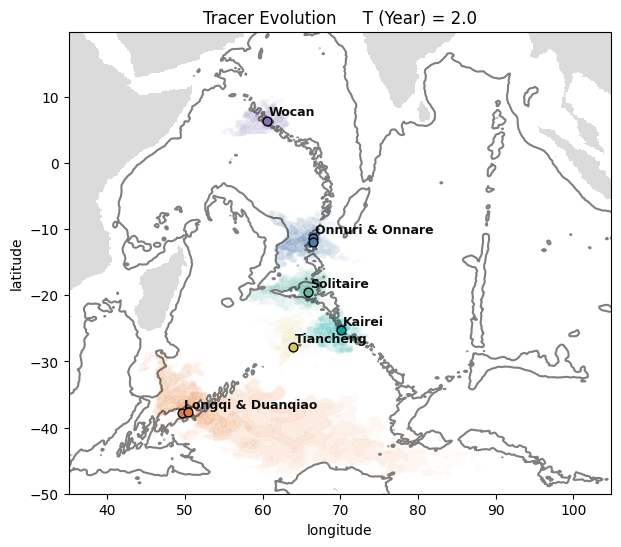

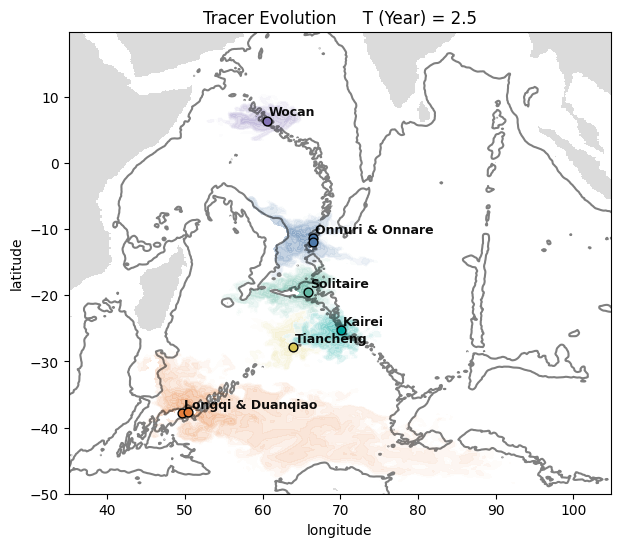

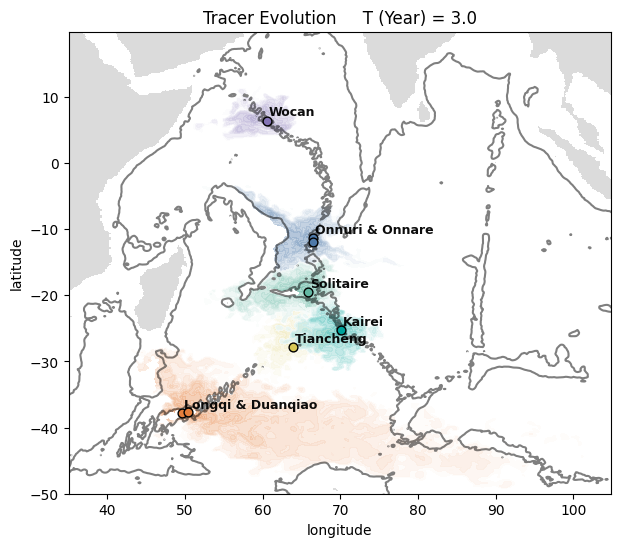

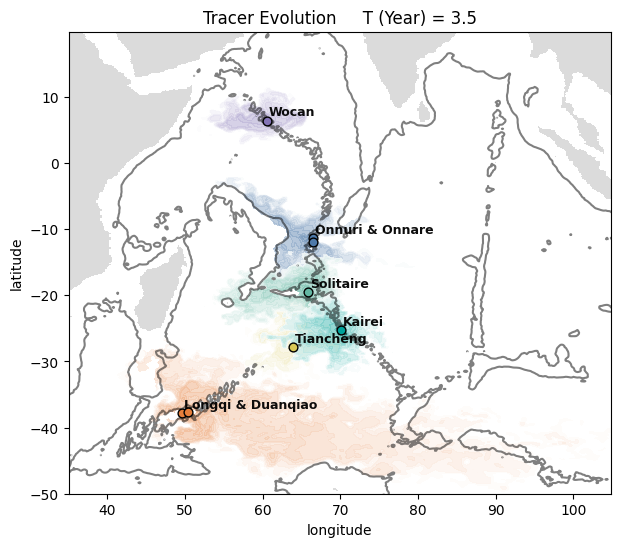

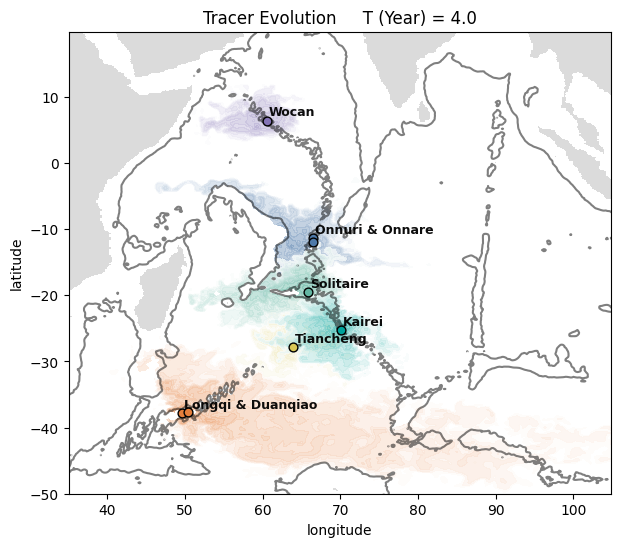

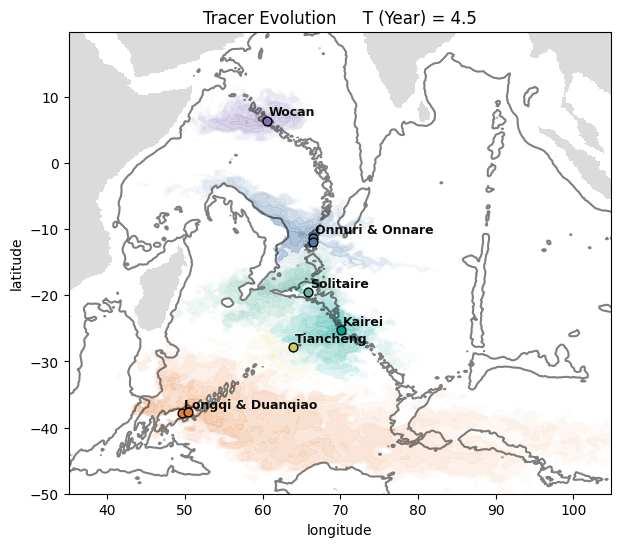

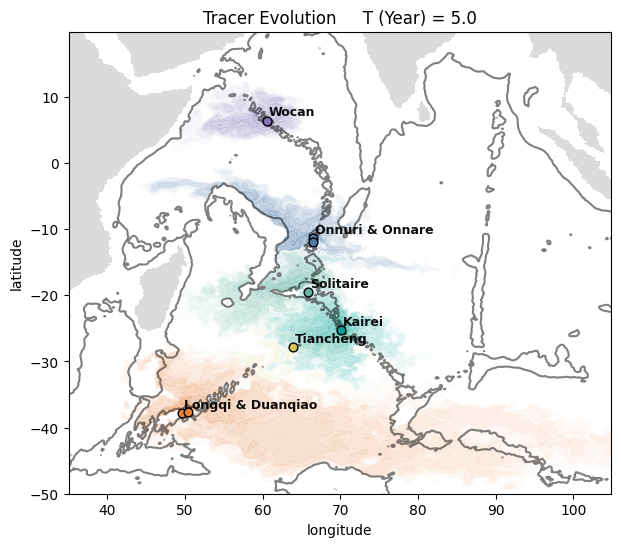

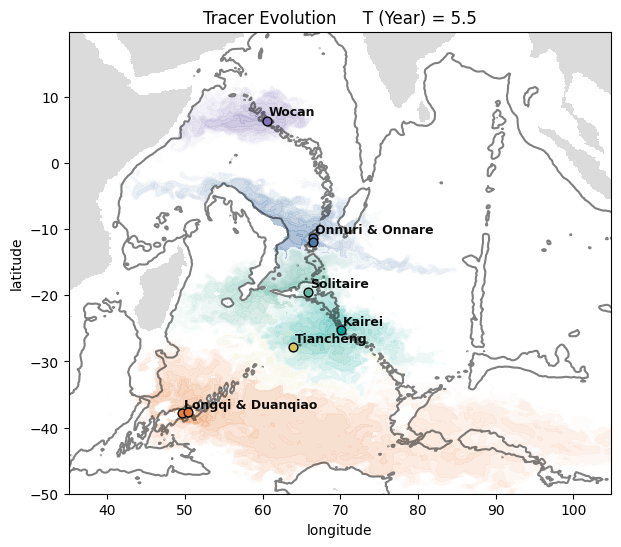

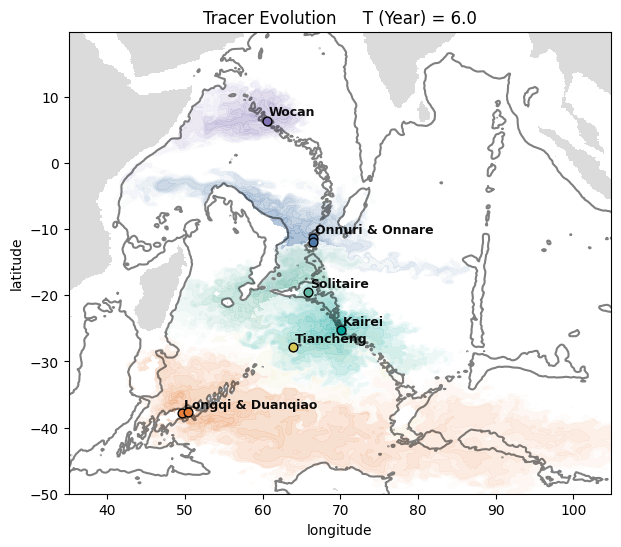

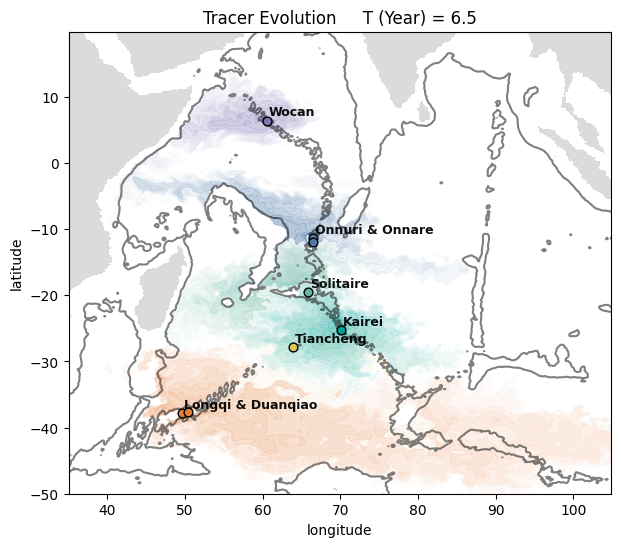

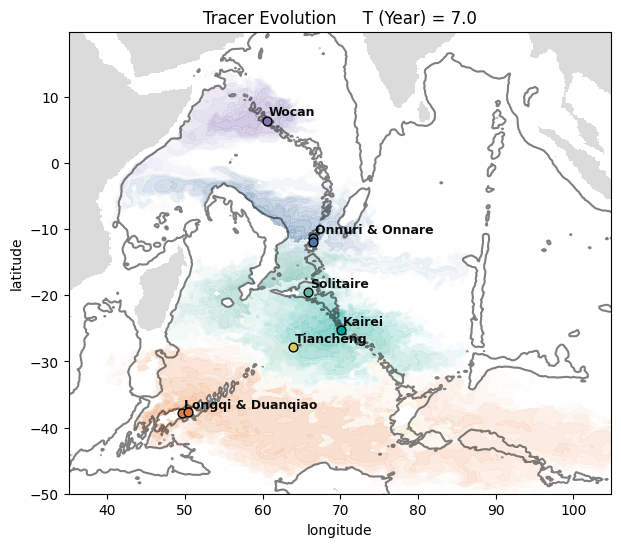

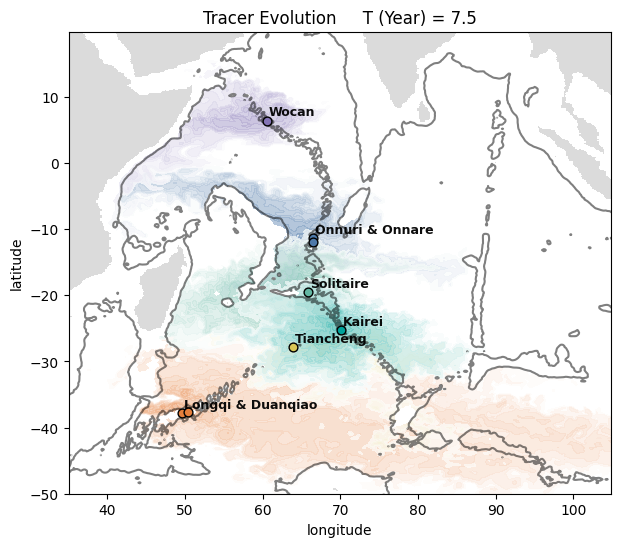

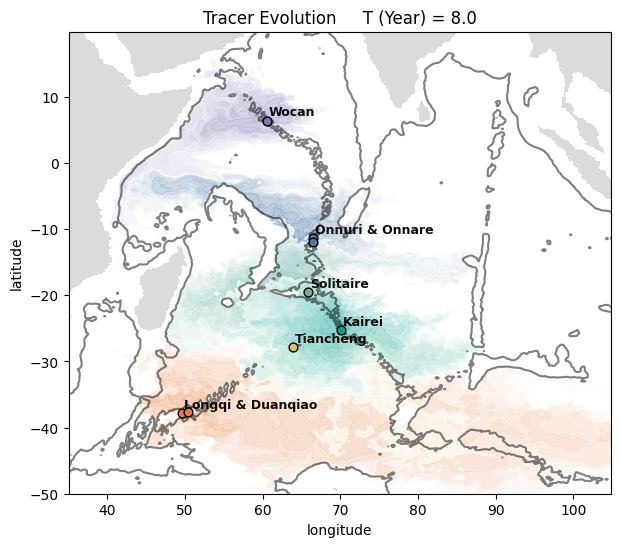

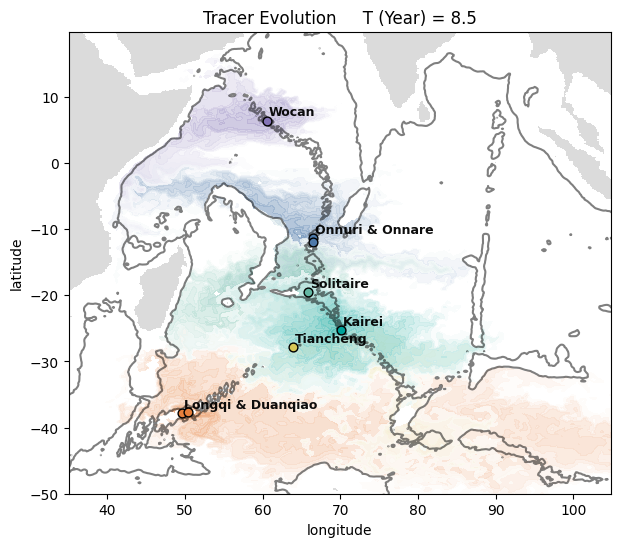

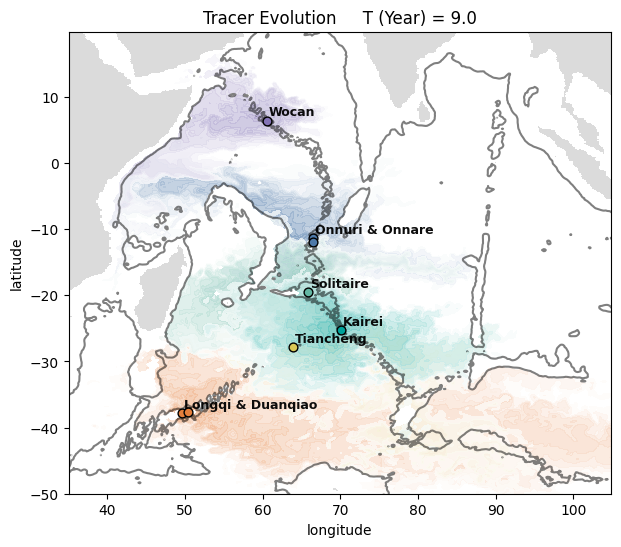

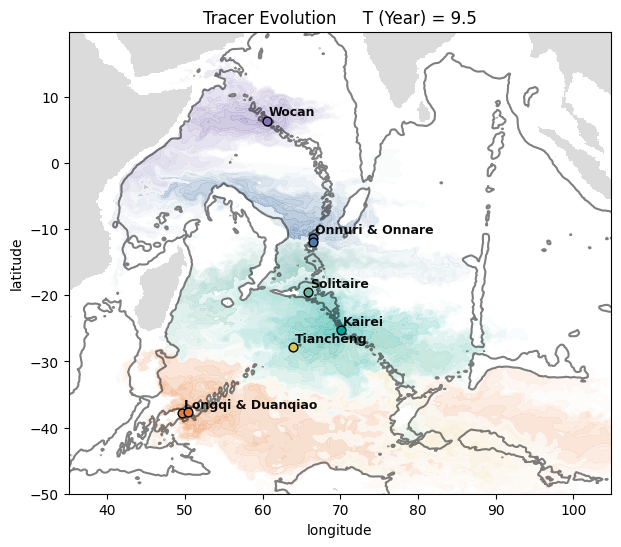

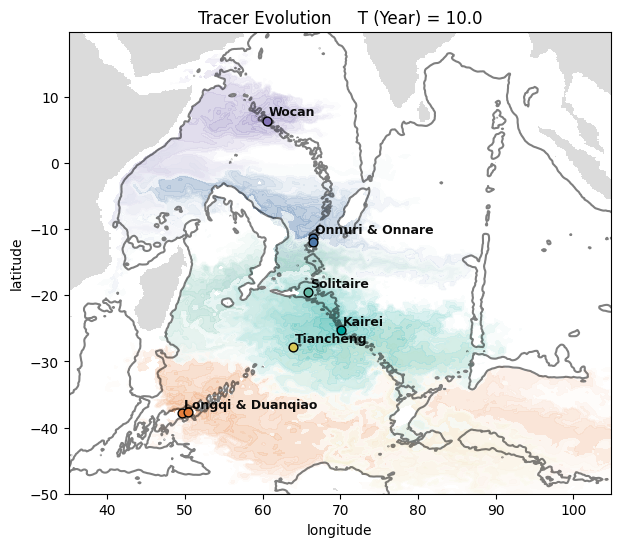

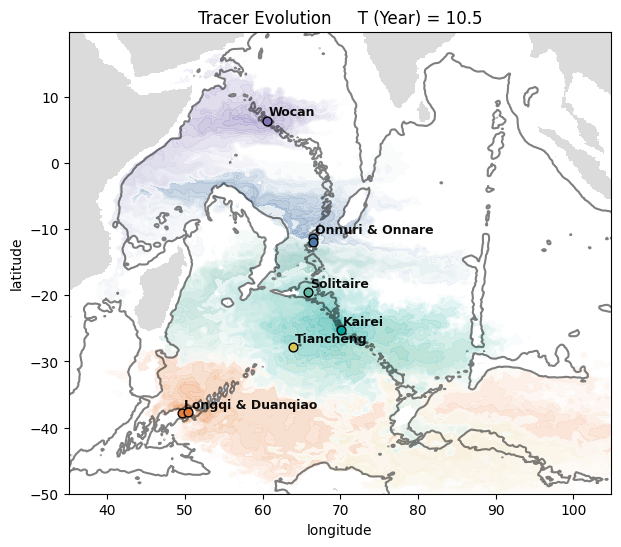

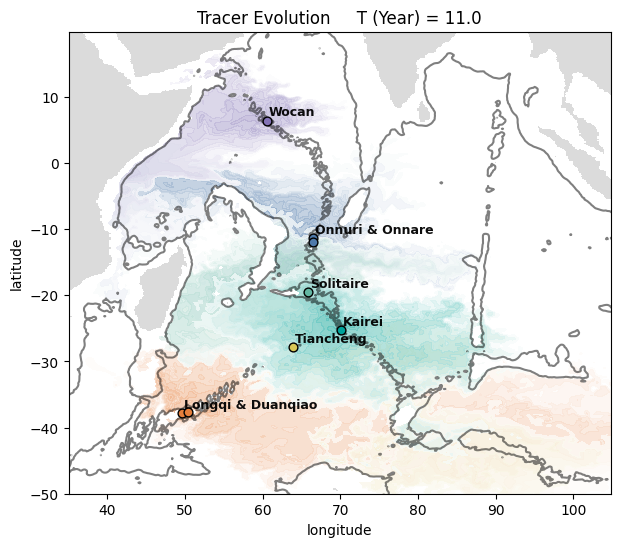

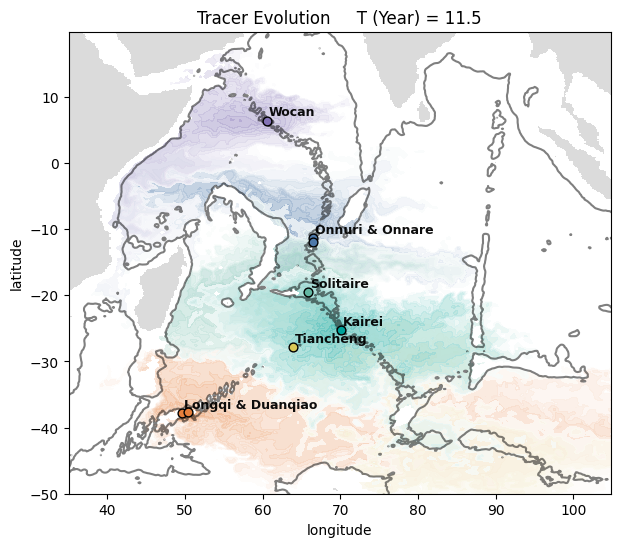

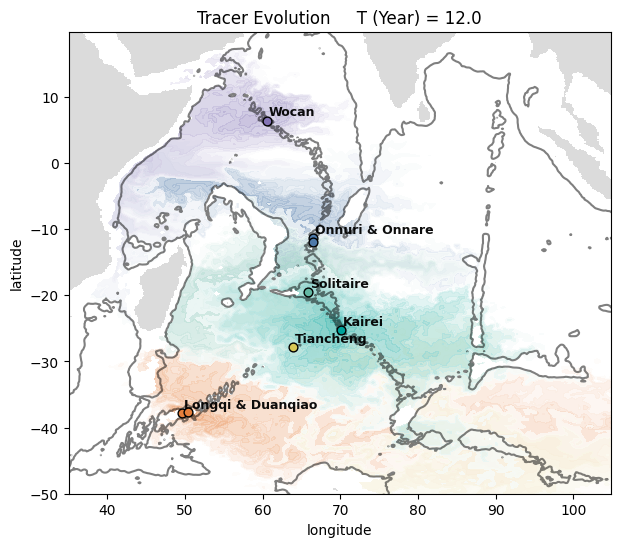

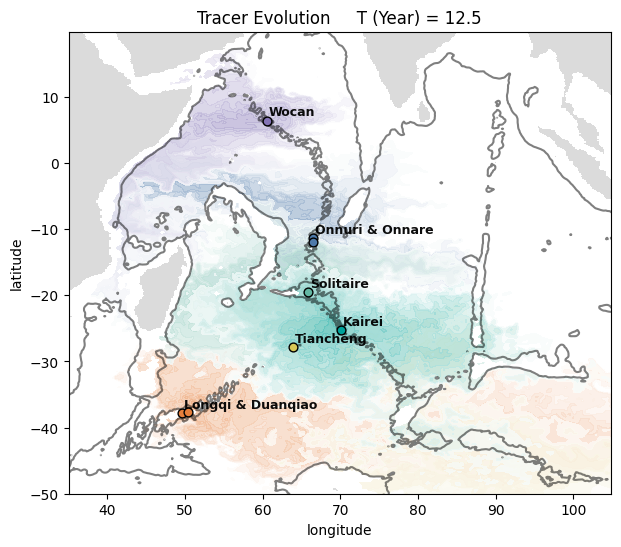

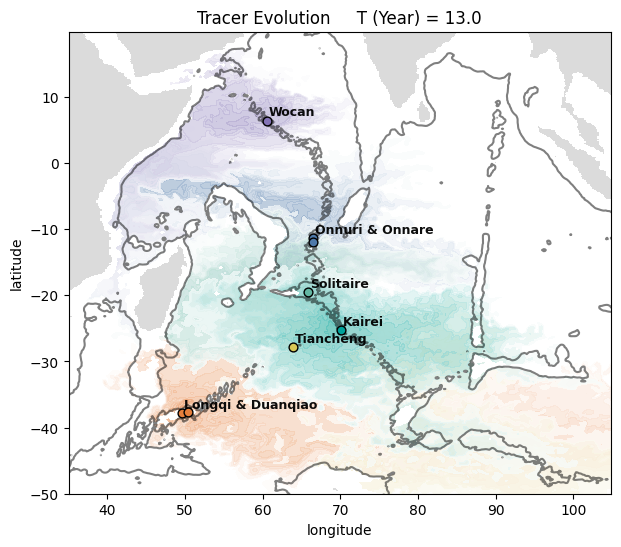

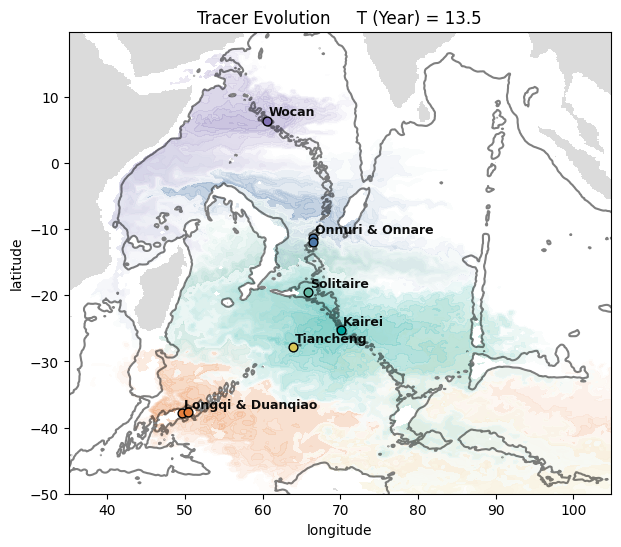

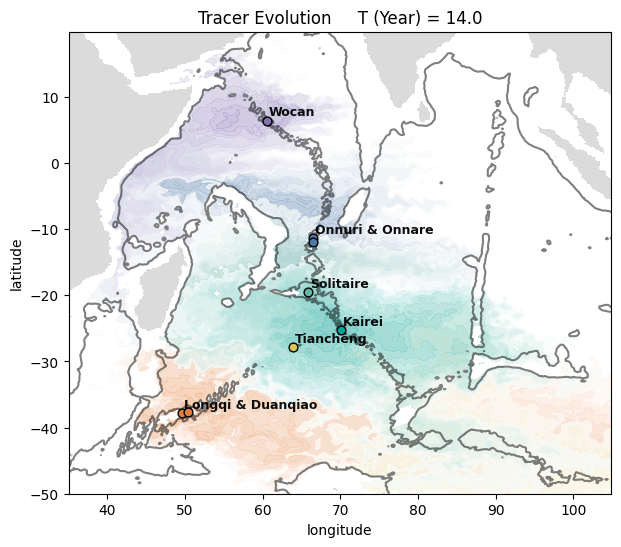

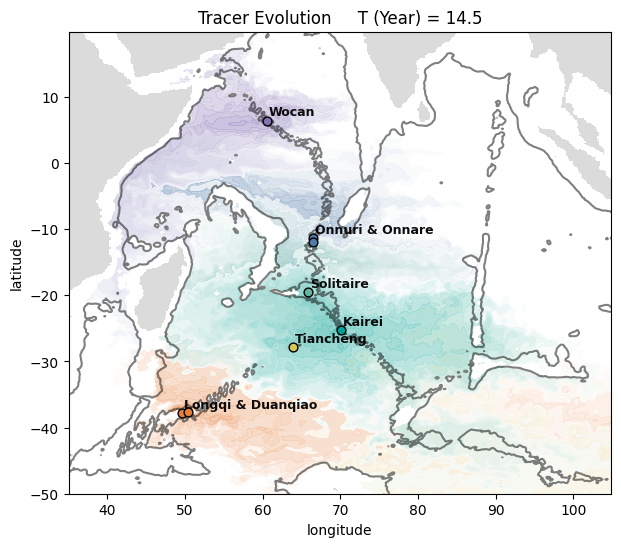

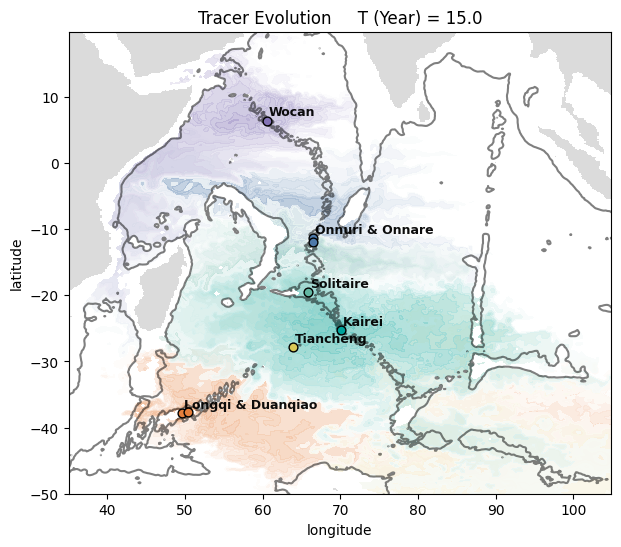

In [118]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

kk = 50
custom_colors = ['#E67F3C','#4E79A9','#D9C756','#8474B6','#63B7A3','#00a29a']
custom_colors2 = ['#63B7A3','#8474B6','#00a29a','#4E79A9','#D9C756','#E67F3C','#E67F3C','#4E79A9']

##site    = ['Solitaire',      'Wocan',      'Kairei',   'Onnuri & Onnare',     'Tiancheng',          'Longqi & Duanqiao', '', '']
#trac01_data = tracers_combined.sel(site='Longqi')
#trac03_data = tracers_combined.sel(site='Tiancheng')
#trac06_data = tracers_combined.sel(site='Kairei')
#trac05_data = tracers_combined.sel(site='Solitaire')
#trac02_data = tracers_combined.sel(site='Onnuri')
#trac04_data = tracers_combined.sel(site='Wocan')

# 创建自定义colormap
cmaps = [mcolors.LinearSegmentedColormap.from_list("custom", ["white", color], N=256) 
         for color in custom_colors]


for tt in range(0,31):
    fig, ax = plt.subplots(1,1,figsize=(7, 6))
    
    land_mask = np.isnan(topo540)

    ax.pcolormesh(topo540.lon, topo540.lat, land_mask.astype(float),
              cmap=mcolors.ListedColormap(['white', 'lightgray']),
              shading='auto', alpha=0.8)
    
    # 绘制示踪剂数据
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[0], alpha=0.7, levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac02_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[1], alpha=0.7, levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac03_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[2], alpha=0.7, levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac04_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[3], alpha=0.7, levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac05_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[4], alpha=0.7, levels=np.arange(2,6.25,0.25))
    ax.contourf(trac01_data.lon.values, trac01_data.lat.values,
                np.log10(trac06_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values), 
                cmap=cmaps[5], alpha=0.7, levels=np.arange(2,6.25,0.25))
    
    ax.set_title('Tracer Evolution     T (Year) = '+str(tt/2))
    ax.set_xlim(np.nanmin(trac01.lon.values), np.nanmax(trac01.lon.values))
    ax.set_ylim(np.nanmin(trac01.lat.values), np.nanmax(trac01.lat.values))
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    # 绘制站点标记
    #ax.scatter(lonall, latall, c='black')
    #for i in range(8):
    #    ax.text(lonall[i]+0.25, latall[i]+0.75, site[i], alpha=0.95)

    for i in range(len(lonall)):
        color = custom_colors2[i]
        ax.scatter(lonall[i], latall[i], c=color, s=40, edgecolor='black', zorder=3)
        ax.text(lonall[i] + 0.25, latall[i] + 0.75, site[i],
                color='k', fontsize=9, weight='bold', alpha=0.95, zorder=3)

    # 绘制等高线：海洋3500米深度和陆地20米高度
    # 注意：使用原始topo540数据
    ax.contour(topo540.lon, topo540.lat, topo540,
               levels=[2997], linestyles=['solid'], colors='black', alpha=0.5)
    #ax.contour(topo540.lon, topo540.lat, topo540,
    #           levels=[10], linestyles=['dashed'], colors='black', alpha=0.5)
   
    # 保存图片
    if tt<10:
        fig.savefig('tracer_0'+str(int(tt))+'Z'+str(int(-trac01.Z[kk].values))+'.png',dpi=1200)
    else:
        fig.savefig('tracer_'+str(int(tt))+'Z'+str(int(-trac01.Z[kk].values))+'.png',dpi=1200)

In [79]:
print("地形数据统计:")
print(f"最小值: {topo540.min().item():.1f}")  # 陆地高度（通常为负值）
print(f"最大值: {topo540.max().item():.1f}")  # 海洋深度（正值）
print(f"平均值: {topo540.mean().item():.1f}")
print(f"NaN值数量: {np.isnan(topo540).sum().item()}")  # 检查缺失值

地形数据统计:
最小值: 0.0
最大值: 6134.5
平均值: 3638.2
NaN值数量: 545611


In [101]:
custom_colors[i % len(custom_colors)]

'#4E79A9'

In [119]:
import os
import imageio
from natsort import natsorted

def create_mp4_from_pngs_old_imageio(png_folder, output_file='output.mp4', fps=1):
    """
    将文件夹中的PNG图片合并为MP4视频 (兼容旧版 imageio)
    """
    png_files = natsorted([f for f in os.listdir(png_folder) if f.endswith('.png')])
    if not png_files:
        print("没有找到PNG文件")
        return

    # 创建视频写入器，使用旧版 imageio 的语法
    # ------------------- 主要修改处 ------------------- #
    with imageio.get_writer(
        output_file,
        fps=fps,
        codec='libx264',
        # 将像素格式参数放入 ffmpeg_params 列表中
        ffmpeg_params=['-pix_fmt', 'yuv420p']
    ) as writer:
    # -------------------------------------------------- #
        for png_file in png_files:
            file_path = os.path.join(png_folder, png_file)
            image = imageio.imread(file_path)
            if image.shape[2] == 4: # 处理PNG的Alpha透明通道
                image = image[..., :3]
            writer.append_data(image)

    print(f"视频已保存为: {output_file}")

# 使用示例
if __name__ == "__main__":
    create_mp4_from_pngs_old_imageio(png_folder='./', output_file='black.tracer_animation_compatible.mp4', fps=1)

/home/xichen/tmp/ipykernel_2386546/2420543980.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file_path)
[rawvideo @ 0x821ff80] Stream #0: not enough frames to estimate rate; consider increasing probesize
Multiple -pix_fmt options specified for stream 0, only the last option '-pix_fmt yuv420p' will be used.
[libx264 @ 0x8235d40] frame MB size (525x450) > level limit (139264)
[libx264 @ 0x8235d40] DPB size (4 frames, 945000 mbs) > level limit (2 frames, 696320 mbs)


视频已保存为: black.tracer_animation_compatible.mp4


In [88]:
print(trac01_data.isel(time=tt, Z=kk).values)

<bound method Mapping.values of <xarray.Dataset> Size: 712kB
Dimensions:                        (lat: 420, lon: 420)
Coordinates:
    time                           datetime64[ns] 8B 2100-05-05T12:00:00
    Z                              float32 4B -2.084e+03
  * lat                            (lat) float64 3kB -50.0 -49.83 ... 19.83
  * lon                            (lon) float64 3kB 35.0 35.17 ... 104.7 104.8
    site                           <U9 36B 'Longqi'
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float32 706kB ...>


In [89]:
trac01_data.isel(time=tt, Z=kk)["__xarray_dataarray_variable__"].values

array([[ 0.10693772,  0.10398265,  0.10197316, ..., 41.5722    ,
        41.2313    , 41.46202   ],
       [ 0.10560833,  0.09633517,  0.09462141, ..., 44.511173  ,
        44.754192  , 45.47354   ],
       [ 0.08965309,  0.08045843,  0.09173767, ..., 46.792126  ,
        50.31273   , 56.774933  ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], shape=(420, 420), dtype=float32)

In [95]:
trac01_data

<xarray.Dataset> Size: 1GB
Dimensions:                        (time: 31, Z: 63, lat: 420, lon: 420)
Coordinates:
  * time                           (time) datetime64[ns] 248B 2089-12-28T12:0...
  * Z                              (Z) float32 252B -0.5 -1.5 ... -5.906e+03
  * lat                            (lat) float64 3kB -50.0 -49.83 ... 19.83
  * lon                            (lon) float64 3kB 35.0 35.17 ... 104.7 104.8
    site                           <U9 36B 'Longqi'
Data variables:
    __xarray_dataarray_variable__  (time, Z, lat, lon) float32 1GB nan ... nan

In [97]:
trac01_data_array = xr.DataArray(
    data=trac01_data.to_array().squeeze(),  # 提取数据并去除多余维度
    dims=["time", "Z", "lat", "lon"],
    coords={
        "Z": trac01_data.Z.values,
        "lat": trac01_data.lat.values,
        "time": trac01_data.time.values,
        "lon": trac01_data.lon.values
    }
)

In [98]:
print(trac01_data_array.shape)

(31, 63, 420, 420)


In [102]:
da.depth.values

array([-5.0000000e-01, -1.5000000e+00, -2.5000000e+00, -3.5000000e+00,
       -4.5000000e+00, -5.5000000e+00, -6.5000000e+00, -7.5000000e+00,
       -8.5000000e+00, -9.5000000e+00, -1.1000000e+01, -1.3000000e+01,
       -1.5000000e+01, -1.7000000e+01, -1.9000000e+01, -2.5000000e+01,
       -3.5000000e+01, -4.5000000e+01, -5.5000000e+01, -6.5000000e+01,
       -7.5004997e+01, -8.5025002e+01, -9.5095001e+01, -1.0531000e+02,
       -1.1587000e+02, -1.2715000e+02, -1.3974001e+02, -1.5447000e+02,
       -1.7239999e+02, -1.9473500e+02, -2.2271001e+02, -2.5747000e+02,
       -2.9992999e+02, -3.5067999e+02, -4.0992999e+02, -4.7747000e+02,
       -5.5271002e+02, -6.3473499e+02, -7.2240002e+02, -8.1447003e+02,
       -9.0973999e+02, -1.0071550e+03, -1.1059050e+03, -1.2055350e+03,
       -1.3062050e+03, -1.4091500e+03, -1.5170950e+03, -1.6341750e+03,
       -1.7651350e+03, -1.9141500e+03, -2.0840349e+03, -2.2762251e+03,
       -2.4912500e+03, -2.7292500e+03, -2.9902500e+03, -3.2742500e+03,
      